In [1]:
#Necessary imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [2]:
#Function to create Bell pair
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [3]:
#Function to encode the message  
def encode_message(qc,qubit,msg):
    if msg=="00":
        pass
    elif msg=="10":
        qc.x(qubit)
    elif msg=="01":
        qc.z(qubit)
    elif msg=="11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("Invalid")

In [4]:
#Function to decode the message
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

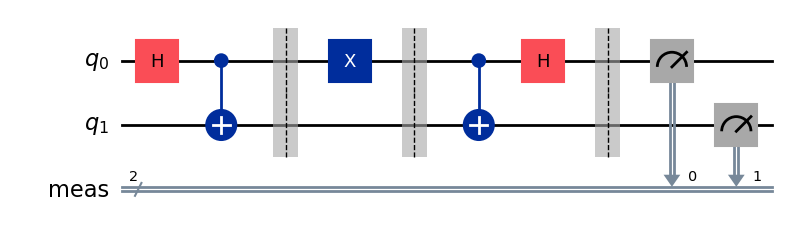

In [9]:
#Creating quantum circuit using two qubits 
qc= QuantumCircuit(2)
create_bell_pair(qc,0,1)
qc.barrier()

message="10"

#Encode message
encode_message(qc,0,message)
qc.barrier()

#Decode message
decode_message(qc,0,1)

qc.measure_all()
qc.draw('mpl')

{'10': 1024}


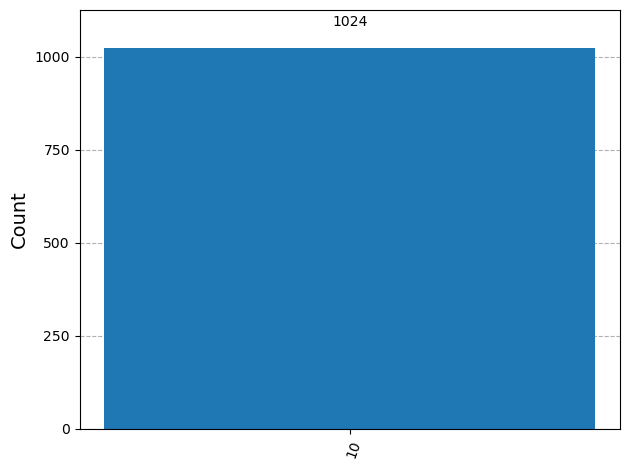

In [10]:
#Simulating using qasm simulator shows 100% probability of the same message being transported
backend=Aer.get_backend('qasm_simulator')
compiled_job=transpile(qc,backend)
run=backend.run(compiled_job)
result=run.result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)